In [48]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
lya = 1215.67

In [49]:
linear_basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16_N1000_largecell'
pixel = 1
pixel100 = pixel//100
iskewer = 4

In [154]:
thermal_cell_numbers = ['range_5000_2','range_5000_2_repnon']
thermal_basedirs = []
for tcn in thermal_cell_numbers:
    thermal_basedirs += [linear_basedir+'_thermal_{}'.format(tcn)]

noRSD THING_ID 268
linear RSD THING_ID 268
thermal range_5000_2 THING_ID 268
thermal range_5000_2_repnon THING_ID 268


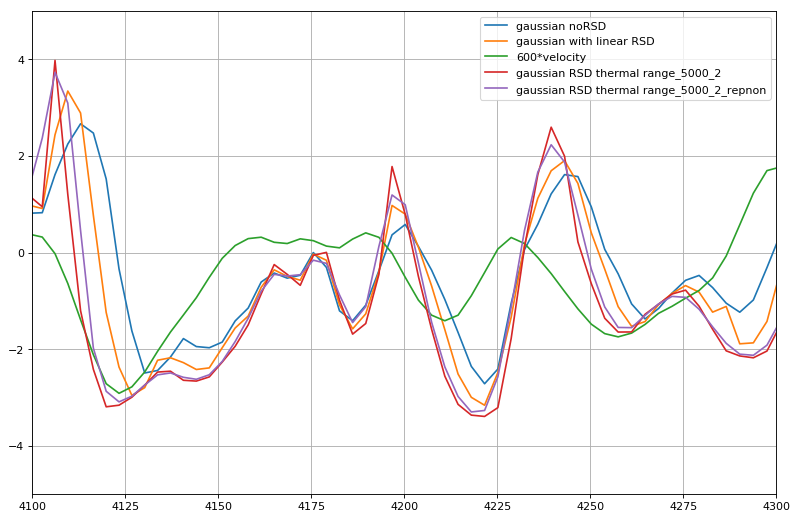

In [208]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-noRSD-16-{}.fits'.format(pixel100,pixel,pixel))
gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,gaussian_skewer,label='gaussian noRSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('noRSD THING_ID', THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/picca-gaussian-RSD-16-{}.fits'.format(pixel100,pixel,pixel))
gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,gaussian_skewer,label='gaussian with linear RSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print('linear RSD THING_ID',THING_ID)
h.close()

h = fits.open(linear_basedir+'/{}/{}/gaussian-colore-16-{}.fits'.format(pixel100,pixel,pixel))
velocity_skewer = h[3].data[np.searchsorted(h[1].data['MOCKID'],THING_ID),:]
lambdas = lya*(1+h[4].data['Z'])
plt.plot(lambdas,600*velocity_skewer,label='600*velocity')
h.close()

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
    gaussian_skewer = h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,gaussian_skewer,label='gaussian RSD thermal {}'.format(thermal_cell_numbers[i]))
    #plt.plot(lambdas,gaussian_skewer-0.00273*lambdas,label='gaussian RSD thermal {}'.format(thermal_cell_numbers[i]))
    print('thermal {}'.format(thermal_cell_numbers[i]),'THING_ID',h[3].data['THING_ID'][iskewer])
    h.close()
    
centre = 4200.
rad = 100.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-5,5)
plt.grid()
plt.legend()
plt.show()

Below includes the extra small scale power (these plots are not useful at the moment - extra noise is added randomly and so each skewer with ssp is different, even if the MOCKID is the same)

In [173]:
linear_basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZsmooth_4096_32_sr2.0_bm1_biasG18_picos_nside16_N1000'
pixel = 1
pixel100 = pixel//100
iskewer = 4

In [178]:
thermal_cell_numbers = [100,1000]
thermal_basedirs = []
for tcn in thermal_cell_numbers:
    thermal_basedirs += [linear_basedir+'_thermal_{}'.format(tcn)]

268
268
268


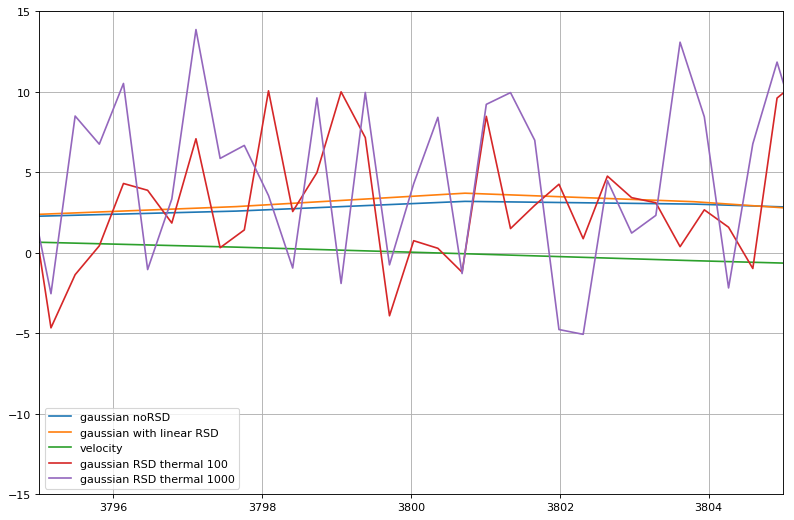

In [179]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

h = fits.open(basedir+'/{}/{}/picca-gaussian-noRSD-16-{}.fits'.format(pixel100,pixel,pixel))
gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,gaussian_skewer,label='gaussian noRSD')
h.close()

h = fits.open(basedir+'/{}/{}/picca-gaussian-RSD-16-{}.fits'.format(pixel100,pixel,pixel))
gaussian_skewer = h[0].data[:,iskewer]
lambdas = 10**h[2].data
plt.plot(lambdas,gaussian_skewer,label='gaussian with linear RSD')
THING_ID = h[3].data['THING_ID'][iskewer]
print(THING_ID)
h.close()

h = fits.open(basedir+'/{}/{}/gaussian-colore-16-{}.fits'.format(pixel100,pixel,pixel))
velocity_skewer = h[3].data[np.searchsorted(h[1].data['MOCKID'],THING_ID),:]
lambdas = lya*(1+h[4].data['Z'])
plt.plot(lambdas,600*velocity_skewer,label='velocity')
h.close()

for i,thermal_basedir in enumerate(thermal_basedirs):
    h = fits.open(thermal_basedir+'/{}/{}/picca-gaussian-16-{}.fits'.format(pixel100,pixel,pixel))
    gaussian_skewer = h[0].data[:,iskewer]
    lambdas = 10**h[2].data
    plt.plot(lambdas,gaussian_skewer,label='gaussian RSD thermal {}'.format(thermal_cell_numbers[i]))
    print(h[3].data['THING_ID'][iskewer])
    h.close()
    
centre = 3800.
rad = 5.
plt.xlim(centre-rad,centre+rad)  
plt.ylim(-15.,15.)
plt.grid()
plt.legend()
plt.show()